In [4]:
import pandas
import gensim
import collections
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from gensim import corpora, models, similarities
from gensim.models.doc2vec import Doc2Vec, LabeledSentence  
from scipy.spatial import distance
from scipy.stats import f, wasserstein_distance
from sklearn.metrics import mutual_info_score

In [2]:
def splitWord(documents):
    stoplist=set('for a of the and to in at after with'.split())  
    texts=[[word for word in document.lower().split() if word not in stoplist] for document in documents]
    # frequency = defaultdict(int)
    # for text in texts:
    #     for token in text:
    #         frequency[token] += 1
    # texts = [[token for token in text if frequency[token] > 1] for text in texts]
    return texts

In [3]:
def euclidean_distance(x,y):
    return math.sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
 
def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))
 
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

def cosine(vector1, vector2):
    tmp = np.linalg.norm(vector1) * np.linalg.norm(vector2)
    if tmp == 0:
        return 0
    else:
        return float(np.dot(vector1,vector2) / tmp)
    
def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

In [4]:
def feature_extraction(stances_path, bodies_path):
    train_stance = pandas.read_csv(stances_path)
    train_bodies = pandas.read_csv(bodies_path)
  
    headlines = train_stance["Headline"].values
    bodies = train_bodies["articleBody"].values
    bodyids =  train_bodies["Body ID"].values
    stanceList = train_stance["Stance"].values

    body_list = list(set(bodyids))

    #create a dictionary for the word
    documents = []
    for bodyid in body_list:
        documents.append(train_bodies[train_bodies["Body ID"] == bodyid]["articleBody"].iloc[0])
    texts = splitWord(documents)

    dictionary = corpora.Dictionary(texts)
    #computer the number of each word in the dictionary
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    corpus_len = len(dictionary)
    
    tfidf = models.TfidfModel(corpus)

    # compute the similarity
    index = similarities.MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))
    cos_sim_List = []
    euclidean_distance_list = []
    wasserstein_distance_list = []
    manhattan_distance_list = []
    KL_list = []
    word_count_list = []
    for i in range(0, len(bodies)):
        new_vec = dictionary.doc2bow(headlines[i].lower().split())
        dict1 = dict(tfidf[new_vec])
        
        j = body_list.index(bodyids[i])
        dict2 = dict(tfidf[corpus[j]])

        vec2 = np.zeros(corpus_len)
        vec1 = np.zeros(corpus_len)

        for a in dict2:
            vec2[a] = dict2[a]
        for a in dict1:
            vec1[a] = dict1[a]
            
        if i % 5000 == 0:
            print(i)
            
        cos_sim_List.append(cosine(vec1, vec2))
        euclidean_distance_list.append(euclidean_distance(vec1, vec2))
        wasserstein_distance_list.append(wasserstein_distance(vec1, vec2))
        manhattan_distance_list.append(manhattan_distance(vec1, vec2))
        KL_list.append(mutual_info_score(vec1, vec2))
        word_count_list.append(len(dict1)+len(dict2))
        
    return [stanceList, cos_sim_List, euclidean_distance_list, wasserstein_distance_list, manhattan_distance_list, KL_list, word_count_list]

In [5]:
# store test features
train_result = feature_extraction('fnc-1/split/train_stances.csv', 'fnc-1/split/train_bodies.csv')

with open("fnc-1/split/train_stances_sim.csv","w") as csvfile:
    df = pd.DataFrame({'Stance': train_result[0], 'cos_sim': train_result[1], 'euclidean_dist': train_result[2],
                   'wasserstein_dist': train_result[3], 'manhattan_dist': train_result[4], 'kl_list': train_result[5], 'word_count_list': train_result[6]})
    df.to_csv(csvfile)

0
5000
10000
15000
20000
25000
30000
35000
40000


In [1]:
# store train features
validation_result = feature_extraction('fnc-1/split/validation_stances.csv', 'fnc-1/split/validation_bodies.csv')


NameError: name 'feature_extraction' is not defined

In [7]:
with open("fnc-1/split/validation_stances_sim.csv","w") as csvfile:
    df = pd.DataFrame({'Stance': validation_result[0], 'cos_sim': validation_result[1], 'euclidean_dist': validation_result[2],
                   'wasserstein_dist': validation_result[3], 'manhattan_dist': validation_result[4], 'kl_list': validation_result[5], 'word_count_list': validation_result[6]})
    df.to_csv(csvfile)

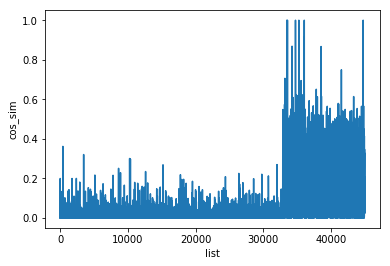

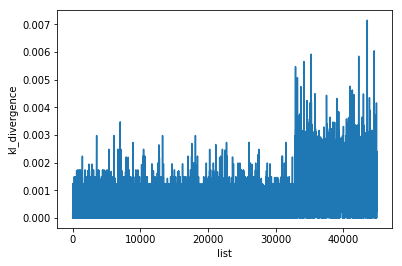

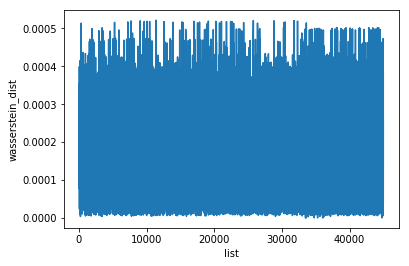

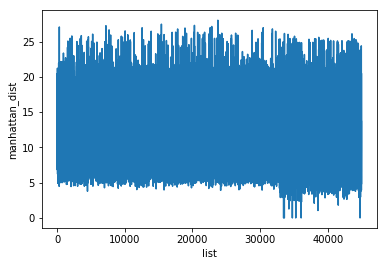

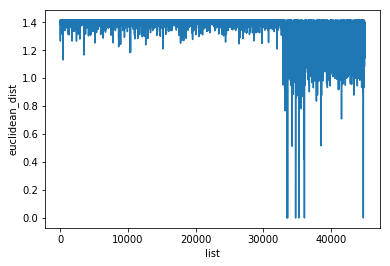

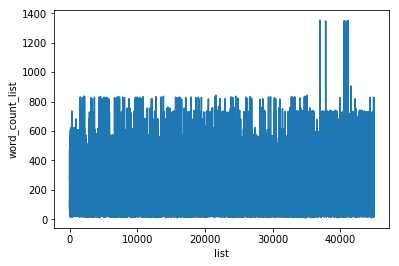

In [7]:
data = pd.read_csv('fnc-1/split/train_stances_sim.csv')
plt.plot(data['cos_sim'])
plt.ylabel('cos_sim')
plt.xlabel('list')
plt.show()


plt.plot(data['kl_list'])
plt.ylabel('kl_divergence')
plt.xlabel('list')
plt.show()

plt.plot(data['wasserstein_dist'])
plt.ylabel('wasserstein_dist')
plt.xlabel('list')
plt.show()

plt.plot(data['manhattan_dist'])
plt.ylabel('manhattan_dist')
plt.xlabel('list')
plt.show()

plt.plot(data['euclidean_dist'])
plt.ylabel('euclidean_dist')
plt.xlabel('list')
plt.show()

plt.plot(data['word_count_list'])
plt.ylabel('word_count_list')
plt.xlabel('list')
plt.show()

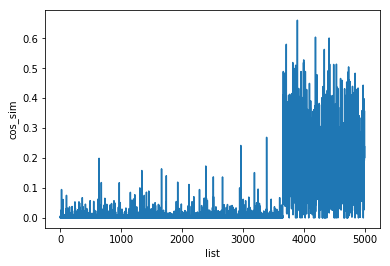

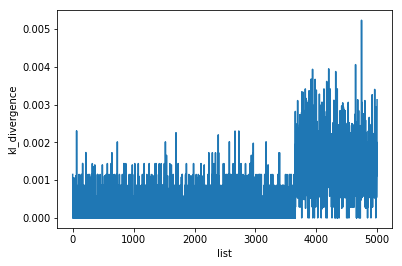

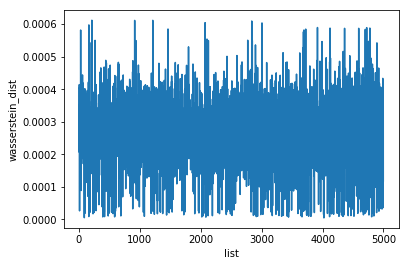

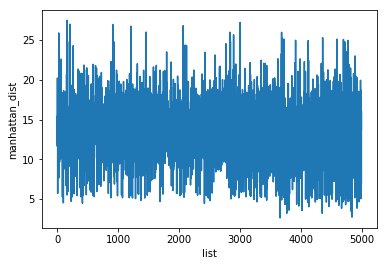

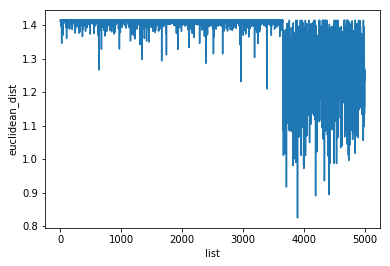

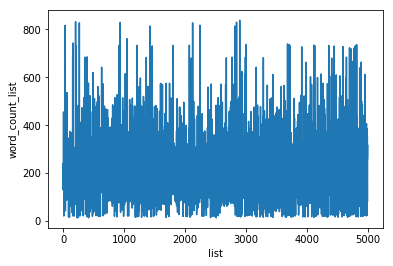

In [5]:
data = pd.read_csv('fnc-1/split/validation_stances_sim.csv')
plt.plot(data['cos_sim'])
plt.ylabel('cos_sim')
plt.xlabel('list')
plt.show()


plt.plot(data['kl_list'])
plt.ylabel('kl_divergence')
plt.xlabel('list')
plt.show()

plt.plot(data['wasserstein_dist'])
plt.ylabel('wasserstein_dist')
plt.xlabel('list')
plt.show()

plt.plot(data['manhattan_dist'])
plt.ylabel('manhattan_dist')
plt.xlabel('list')
plt.show()

plt.plot(data['euclidean_dist'])
plt.ylabel('euclidean_dist')
plt.xlabel('list')
plt.show()

plt.plot(data['word_count_list'])
plt.ylabel('word_count_list')
plt.xlabel('list')
plt.show()